In [1]:
# Naive Bayes

In [21]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB

%matplotlib inline

In [22]:
# Importing the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2,3]].values
# y = dataset.iloc[:, -1].values
y = dataset.iloc[:, 4].values

In [23]:
# Splitting the dataset into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [24]:
# Feature Scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [26]:
# Fitting our model to the training set
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [27]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [28]:
# Making the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm
# you can also ravel it and extract the analytics separately
# tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()


# Model evaluation
from sklearn.metrics import confusion_matrix

# Get true negatives, false positives, false negatives, true positives
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
tn, fp, fn, tp

# Get the accuracy score
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

# Get the precision score
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)

# Get the recall score
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)

# Get the F-1 score
from sklearn.metrics import f1_score
f1_score = f1_score(y_test, y_pred)

print('True negatives: {tn}, False positives: {fp}, False negatives: {fn}, True Positives: {tp}'.format(tn=tn, fp=fp, fn=fn, tp=tp))
print('Accuracy: {0}, Precision: {1}, Recall: {2}, F-1 Score: {3}'.format(accuracy, precision, recall, f1_score))

True negatives: 65, False positives: 3, False negatives: 7, True Positives: 25
Accuracy: 0.9, Precision: 0.892857142857, Recall: 0.78125, F-1 Score: 0.833333333333


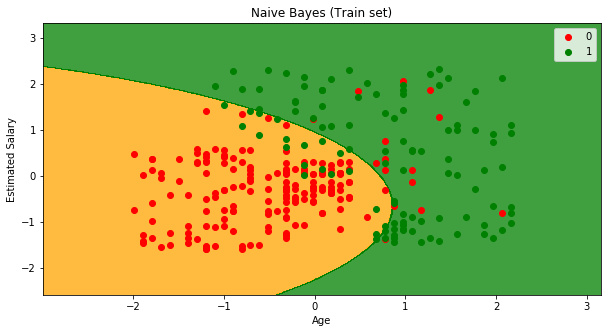

In [29]:
# Visualising the train set results
from matplotlib.colors import ListedColormap

X_set, y_set = X_train, y_train
plt.rcParams['figure.figsize'] = [10, 5]

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('orange', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)

plt.title('Naive Bayes (Train set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

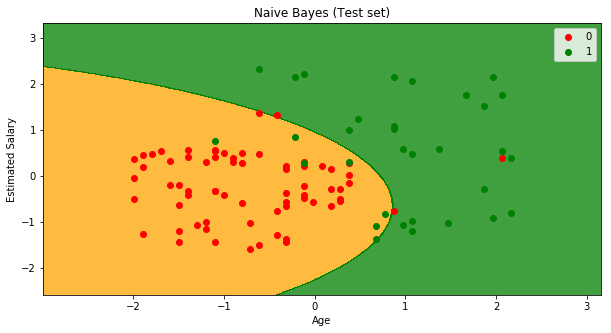

In [30]:
# Visualising the test set results
from matplotlib.colors import ListedColormap

X_set, y_set = X_test, y_test
plt.rcParams['figure.figsize'] = [10, 5]

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('orange', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)

plt.title('Naive Bayes (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()